In [1]:
import skimage
import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage as ndi
from skimage import feature
from skimage import io

In [2]:
im = io.imread('./15-seconds.png',as_gray=True)

In [38]:
im.shape

(768, 1366)

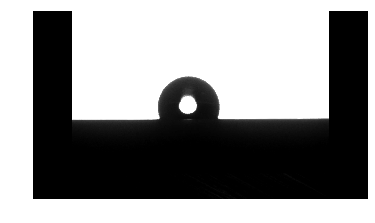

In [3]:
plt.imshow(im,cmap = 'gray',vmin = 0, vmax = 1)
plt.gca().axis('off');

(-0.5, 1365.5, 767.5, -0.5)

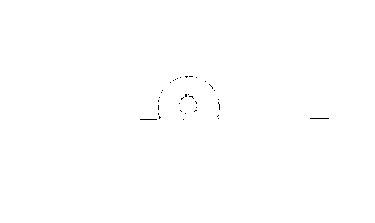

In [4]:
e1 = feature.canny(im,sigma = 0,low_threshold = 0.1, high_threshold = 0.5)
plt.imshow(e1,cmap = 'gray_r',vmin = 0, vmax = 1)
plt.gca().axis('off')

In [5]:
e1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [48]:
ind = np.array([[i,j] for j,row in enumerate(e1) for i,x in enumerate(row) if x])
crop = np.array([[x,y] for x,y in ind if (x >= 400 and x <= 800 and y >= 200 and y <= 600 )])

In [49]:
crop.shape

(1487, 2)

(600, 200)

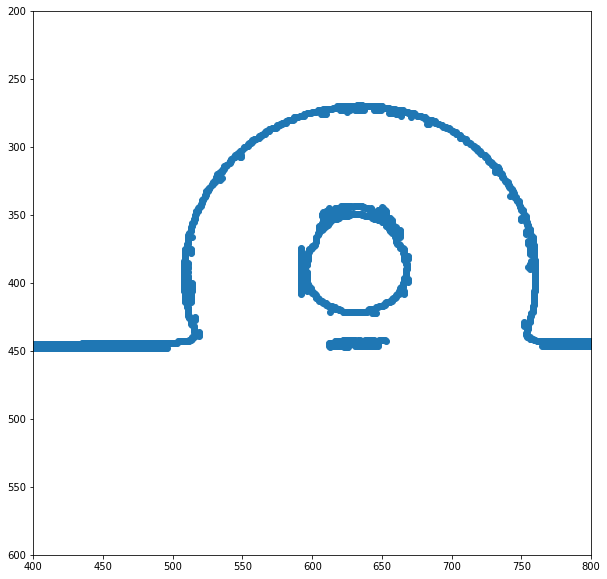

In [55]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.scatter(crop[:,0],crop[:,1])
plt.xlim([400,800])
plt.ylim([600,200])

In [57]:
baseline_l = np.array([[x,y] for x,y in ind if (x >= 400 and x <= 420 and y >= 200 and y <= 600 )])
baseline_r = np.array([[x,y] for x,y in ind if (x >= 780 and x <= 800 and y >= 200 and y <= 600 )])

In [59]:
baseline_r

array([[780, 443],
       [781, 443],
       [782, 443],
       [783, 443],
       [784, 443],
       [785, 443],
       [786, 443],
       [787, 443],
       [788, 443],
       [789, 443],
       [790, 443],
       [791, 443],
       [792, 443],
       [793, 443],
       [794, 443],
       [795, 443],
       [796, 443],
       [797, 443],
       [798, 443],
       [799, 443],
       [800, 443],
       [780, 446],
       [781, 446],
       [782, 446],
       [783, 446],
       [784, 446],
       [785, 446],
       [786, 446],
       [787, 446],
       [788, 446],
       [789, 446],
       [790, 446],
       [791, 446],
       [792, 446],
       [793, 446],
       [794, 446],
       [795, 446],
       [796, 446],
       [797, 446],
       [798, 446],
       [799, 446],
       [800, 446]])

In [73]:
A = np.ones((baseline_l.shape[0] + baseline_r.shape[0],2))
A[:,1] = np.concatenate((baseline_l[:,0],baseline_r[:,0]))
c = np.concatenate((baseline_l[:,1],baseline_r[:,1]))
thet = np.linalg.lstsq(A,c)
thet

/home/mike/miniconda3/envs/images/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


(array([ 4.48654691e+02, -5.25781754e-03]),
 array([189.08523199]),
 2,
 array([5.76849689e+03, 2.76815668e+00]))

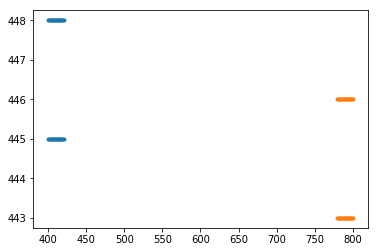

In [75]:
plt.plot(baseline_l[:,0],baseline_l[:,1],'.')
plt.plot(baseline_r[:,0],baseline_r[:,1],'.')

(0, -50)

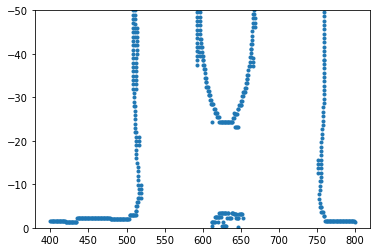

In [82]:
b,m = thet[0]
plt.plot(crop[:,0],crop[:,1] - (m*crop[:,0]+b),'.')
plt.ylim([0,-50])